In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/siddhant-dutta/MOODIFY-learning/main/Assignment_3/problem2/train.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/siddhant-dutta/MOODIFY-learning/main/Assignment_3/problem2/test.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train, y_train = data.iloc[:,1:].values.astype('float32'), data.iloc[:,0].values.astype('int32')
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_train.shape


(42000, 28, 28)

In [4]:
x_test = data2.iloc[:,0:].values.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28)
x_test.shape

(28000, 28, 28)

In [5]:
x_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
         94.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

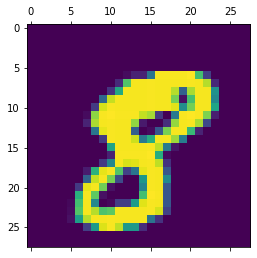

In [6]:
plt.matshow(x_train[10])    # just visualization of the train data as an image

In [7]:
x_train_ft = x_train.reshape(x_train.shape[0], 28*28)
x_test_ft = x_test.reshape(x_test.shape[0], 28*28)

In [8]:
x_train_ft /= 255
x_test_ft /= 255
x_test_ft[1].shape

(784,)

In [9]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [10]:
x_train_ft

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
model = keras.Sequential([
        keras.layers.Dense(100,input_shape=(784,), activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
        ])
model.compile(optimizer ="adam", loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [26]:
model.fit(x_train_ft, y_train, epochs =3)

Epoch 1/3
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5042 - accuracy: 0.8517
Epoch 2/3
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1217 - accuracy: 0.9624
Epoch 3/3
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0823 - accuracy: 0.9734


In [34]:
# This function will give the predictions as a list 
def Prediction(x_test_ft):
  y_pred = model.predict(x_test_ft)
  y_pred_num = [np.argmax(i) for i in y_pred]
  return y_pred_num
Prediction(x_test_ft)[0:7]

[2, 0, 9, 9, 3, 7, 0]

In [28]:
y_pred_labels = Prediction(x_train_ft)   

In [29]:
s,e = int(input()), int(input()) 
y_pred_labels[s:e]  

5
6


[0]

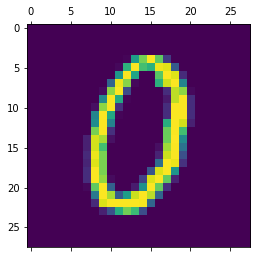

In [31]:
for i in range(s,e):
  plt.matshow(x_train[i])

In [32]:
# Confusion matrix for the trained data and its predicted values
cm = tf.math.confusion_matrix(labels=y_train,predictions= y_train_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4080,    0,    2,    3,    1,    4,   23,    3,   12,    4],
       [   0, 4630,   11,    2,    3,    2,    1,    8,   24,    3],
       [   5,    4, 4101,    7,    4,    5,    3,   19,   25,    4],
       [   1,    9,   21, 4125,    1,   85,    0,   14,   62,   33],
       [   1,    4,    3,    0, 3954,    2,   15,    2,    8,   83],
       [   6,    1,    4,    6,    1, 3731,   12,    4,   22,    8],
       [  10,    6,    1,    0,    4,    8, 4097,    0,   11,    0],
       [   1,   16,   17,    0,    6,    3,    0, 4321,    3,   34],
       [   5,    7,    4,    5,    4,    7,    7,    3, 4004,   17],
       [   7,    2,    2,    7,   12,   10,    0,   22,   11, 4115]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

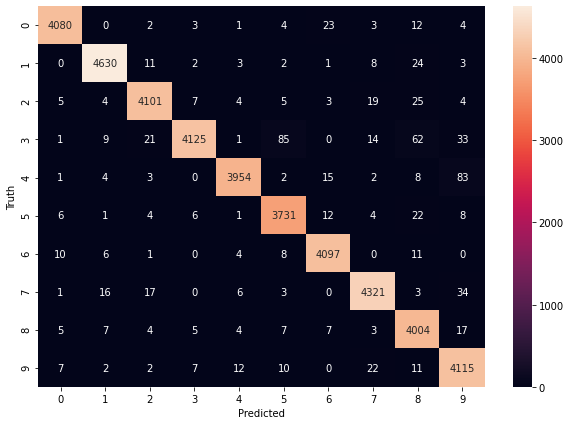

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')